In [1]:
%%html
<!-- Potrzebne dla poprawnego wyświetlania tqdm w VSCode https://stackoverflow.com/a/77566731 -->
<style>
.cell-output-ipywidget-background {
    background-color: transparent !important;
}
:root {
    --jp-widgets-color: var(--vscode-editor-foreground);
    --jp-widgets-font-size: var(--vscode-editor-font-size);
}
</style>

## Wczytanie zbioru danych
Poniższy kod przygotowuje zbiór danych do przeprowadzenia treningu. Zostały przygotowane dwa scenariusze:

- A2D2
- Cityscapes

Odpowiedni zbiór wystarczy odkomentować w celu przeprowadzenia na nim treningu.

In [2]:
from transforms import *
from utils.encoding import ClassMapper

from torchvision.datasets import Cityscapes
from datasets import A2D2Dataset

a2d2_root = ".\\data\\a2d2\\"
cityscapes_root = ".\\data\\cityscapes"

#A2D2

# mapper = ClassMappeer(
#     dataset_class=A2D2Dataset,
#     train_transforms=transforms,
#     infer_transforms=transforms_test,
#     reduced_subset=True
#     )

# train_dataset = A2D2Dataset(
#     root=a2d2_root,
#     split='train',
#     transforms=mapper.wrap_train
    
# )

# test_dataset = A2D2Dataset(
#     root=a2d2_root,
#     split='val',
#     transforms=mapper.wrap_train
# )

# Cityscapes

mapper = ClassMapper(
    dataset_class=Cityscapes,
    train_transforms=transforms,
    infer_transforms=transforms_test,
    reduced_subset=True
    )

train_dataset = Cityscapes(
    root=cityscapes_root,
    split='train',
    target_type="semantic",
    transforms=mapper.wrap_train
)

test_dataset = Cityscapes(
    root=cityscapes_root,
    split='val',
    target_type="semantic",
    transforms=mapper.wrap_train
)

range(0, 256)
range(0, 256)
range(0, 256)
range(0, 256)
range(0, 256)
range(0, 256)
range(0, 256)
range(0, 256)
range(0, 256)
range(0, 256)
range(0, 256)
range(0, 256)
range(0, 256)
range(0, 256)
range(0, 256)
range(0, 256)
range(0, 256)
range(0, 256)
range(0, 256)
range(0, 256)
range(0, 256)
range(0, 256)
range(0, 256)
range(0, 256)
range(0, 256)
range(0, 256)
range(0, 256)
range(0, 256)
range(0, 256)
range(0, 256)
range(0, 256)
range(0, 256)
range(0, 256)
range(0, 256)
range(0, 256)


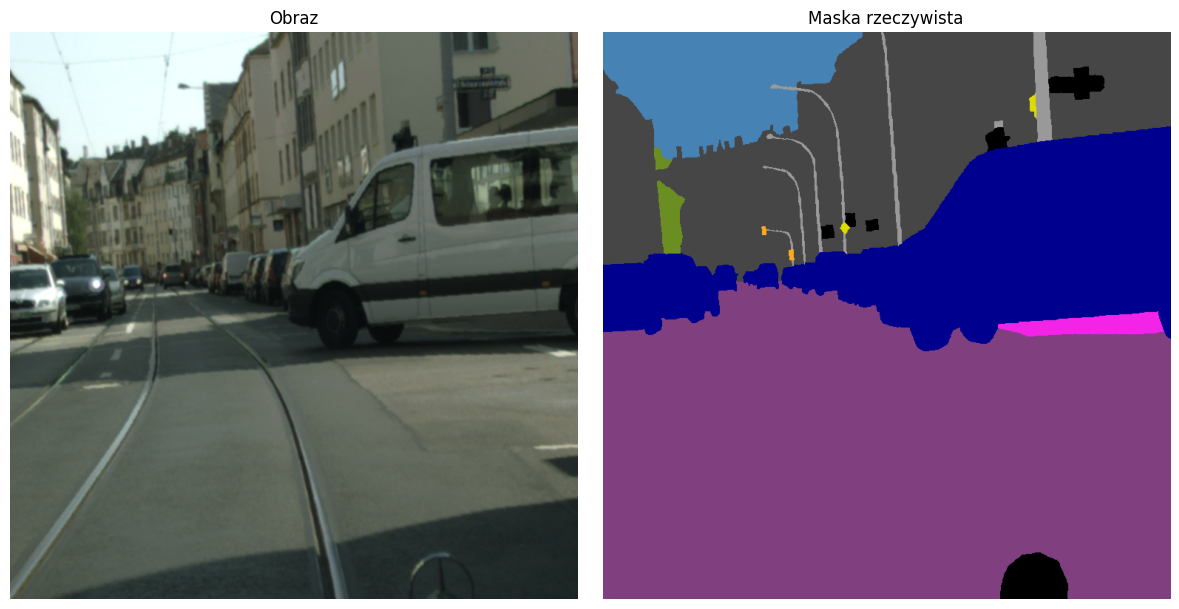

In [14]:
from utils.image import *

image, mask = test_dataset[5]

display_image_and_mask(image=image, mask_true=mask, mapper=mapper)

In [4]:
# Wyświetlanie widocznych na obrazie masek

classes = np.unique(mask)
names = {
    f'{mapper.mapping[int(cid)][1]}'
    for cid in classes
    if int(cid) in mapper.mapping
}
print("\n".join(names))

pole
traffic sign
sky
road
building
car
sidewalk
unlabeled


In [5]:
from torch.utils.data import DataLoader

batch_size = 4

train_loader = DataLoader(
    train_dataset, 
    batch_size=batch_size, 
    shuffle=True, 
    num_workers=12, 
    pin_memory=True,
    persistent_workers=True,
    prefetch_factor=4,
    drop_last=True
)

test_loader = DataLoader(
    test_dataset, 
    batch_size=batch_size, 
    shuffle=False,
    num_workers=4, 
    pin_memory=True,
    drop_last=True
)

## Trening
Poniższy skrypt inicjalizuje model oraz rozpoczyna jego trening przy zadanych wartościach hiperparametrów.

In [ ]:
import os
import segmentation_models_pytorch as smp

from training.setup_training import *

# backbones = [
#     smp.DeepLabV3, smp.DeepLabV3Plus, smp.Linknet, smp.Segformer, smp.Unet, 
#     smp.UnetPlusPlus, smp.FPN, smp.PAN, smp.UPerNet, smp.MAnet, smp.PSPNet
# ]

# backbones = [
#     smp.Unet, smp.DeepLabV3Plus, smp.Segformer, smp.PAN
#     ]

backbones = [
    smp.DeepLabV3Plus
    ]

# encoders = [
#     'resnet50', 'resnext50_32x4d', 'se_resnext50_32x4d', 'efficientnet-b4', 'mit_b1', 'mobileone_s4', 'resnext101_32x8d'
# ]

encoders = [
    'mobileone_s4'
]

for backbone in backbones:
    for encoder in encoders:
        setup_training(
            train_loader=train_loader,
            val_loader=test_loader,
            mapper=mapper,
            backbone=backbone,
            encoder=encoder,
            weights='imagenet'
        )


c:\Users\fhcar\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning_fabric\connector.py:571: `precision=16` is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
Using 16bit Automatic Mixed Precision (AMP)
You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer(val_check_interval=1.0)` was configured so validation will run at the end of the training epoch..
You are using a CUDA device ('NVIDIA GeForce RTX 4070 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precisi

Finding best initial lr:   0%|          | 0/743 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=743` reached.
Learning rate set to 0.00018701256809357133
Restoring states from the checkpoint path at c:\Users\fhcar\Desktop\projekt\.lr_find_b7a090f8-050c-41ab-ae58-9c3d24e8eaf1.ckpt
Restored all states from the checkpoint at c:\Users\fhcar\Desktop\projekt\.lr_find_b7a090f8-050c-41ab-ae58-9c3d24e8eaf1.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type          | Params | Mode 
-----------------------------------------------------
0 | model      | DeepLabV3Plus | 16.1 M | train
1 | dice_loss  | DiceLoss      | 0      | train
2 | focal_loss | FocalLoss     | 0      | train
-----------------------------------------------------
16.1 M    Trainable params
0         Non-trainable params
16.1 M    Total params
64.295    Total estimated model params size (MB)
533       Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


## Przykłady interferencji
Poniższy kod prezentuje przykłady interferencji.
- Interferencja na `test_dataset` z wyświetlaniem maski rzeczywistej.
- Interferencja na pojedyńczym obrazie ze zbioru testowego.
- Interferencja na własnym obrazie.

In [ ]:
import glob, os

def find_checkpoints(logs_root):
    checkpoint_files = {}
    logs = glob.glob(os.path.join(logs_root, '*'))
    for log in logs:
        versions = glob.glob(os.path.join(log, 'version_*'))
        for version_pth in versions:
            version = version_pth.split('_')[1]
            checkpoints = glob.glob(os.path.join(version_pth, 'checkpoints', '*.ckpt'))
            for checkpoint in checkpoints:
                checkpoint_files.update({checkpoint: [version]})
    return checkpoint_files

find_checkpoints('.\\logs')

{'.\\logs\\DeepLabV3Plus\\version_1\\checkpoints\\epoch=49-step=37150.ckpt': ['1'],
 '.\\logs\\DeepLabV3Plus\\version_2\\checkpoints\\epoch=49-step=37150.ckpt': ['2'],
 '.\\logs\\DeepLabV3Plus\\version_3\\checkpoints\\epoch=49-step=37150.ckpt': ['3'],
 '.\\logs\\DeepLabV3Plus\\version_4\\checkpoints\\epoch=49-step=37150.ckpt': ['4'],
 '.\\logs\\DeepLabV3Plus\\version_5\\checkpoints\\epoch=49-step=37150.ckpt': ['5'],
 '.\\logs\\DeepLabV3Plus\\version_6\\checkpoints\\epoch=49-step=37150.ckpt': ['6'],
 '.\\logs\\DeepLabV3Plus\\version_8\\checkpoints\\epoch=49-step=37150.ckpt': ['8']}

In [ ]:
import os
import torch
from segmentation_models_pytorch.decoders.deeplabv3.model import DeepLabV3Plus

def fix_checkpoint(old_path: str, new_path: str,
                   weight_key='model.segmentation_head.0.weight',
                   bias_key='model.segmentation_head.0.bias'):
    # 1. Zezwól na pełne ładowanie klasy
    torch.serialization.add_safe_globals([DeepLabV3Plus])
    ckpt = torch.load(old_path, map_location='cpu', weights_only=False)

    # 2. Wyciągnij state_dict
    state = ckpt.get('state_dict', ckpt)
    w = state[weight_key]; b = state[bias_key]
    C_old = w.shape[0]
    if b.shape[0] != C_old:
        raise ValueError(f"Mismatched channels: {C_old} vs {b.shape[0]}")

    # 3. Obetnij ostatni kanał (klasa 255/unlabeled)
    state[weight_key] = w[:C_old-1].clone()
    state[bias_key]   = b[:C_old-1].clone()

    # 4. Zapisz nowy checkpoint, zachowując pozostałe klucze
    fixed = ckpt.copy()
    fixed['state_dict'] = state
    torch.save(fixed, new_path)
    print(f"✅ Checkpoint poprawiony: {new_path}")

# Przykład masowego użycia:
for fname in os.listdir('./logs'):
    if fname.endswith('.pth'):
        base, ext = os.path.splitext(fname)
        fix_checkpoint(f'./logs/{fname}', f'./logs/{base}_fixed{ext}')

In [38]:
ckpts = find_checkpoints('.\\logs')

for ckpt in ckpts:
    name, ext = os.path.splitext(ckpt)
    fix_checkpoint(ckpt, f'{name}_fixed{ext}')

UnpicklingError: Weights only load failed. This file can still be loaded, to do so you have two options, [1mdo those steps only if you trust the source of the checkpoint[0m. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL segmentation_models_pytorch.decoders.deeplabv3.model.DeepLabV3Plus was not an allowed global by default. Please use `torch.serialization.add_safe_globals([segmentation_models_pytorch.decoders.deeplabv3.model.DeepLabV3Plus])` or the `torch.serialization.safe_globals([segmentation_models_pytorch.decoders.deeplabv3.model.DeepLabV3Plus])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.

In [9]:
import torch
from utils.image import *
from training.model import ExperimentalModel


import segmentation_models_pytorch as smp

# Załadowanie modelu

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = ExperimentalModel.load_from_checkpoint(
    model_arch=smp.DeepLabV3Plus,
    checkpoint_path=".\\logs\\DeepLabV3Plus\\version_2\\checkpoints\\epoch=49-step=37150.ckpt",
    weights="imagenet",
    encoder="resnext50_32x4d",
    in_channels=3,
    mapper=mapper
)

model = model.to(device)

RuntimeError: Error(s) in loading state_dict for ExperimentalModel:
	size mismatch for model.segmentation_head.0.weight: copying a param with shape torch.Size([21, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([20, 256, 1, 1]).
	size mismatch for model.segmentation_head.0.bias: copying a param with shape torch.Size([21]) from checkpoint, the shape in current model is torch.Size([20]).

In [ ]:
import torch
from utils.image import *

# Cały zbiór walidacyjny

images, masks = next(iter(test_loader))
images = images.to(device)
masks  = masks.to(device)

masks = masks.squeeze(1)

with torch.inference_mode():
    model.eval()
    logits = model(images)

pr_masks = logits.softmax(dim=1).argmax(dim=1)

for idx, (image, gt_mask, pr_mask) in enumerate(zip(images, masks, pr_masks)):
    if idx > 4:  # Visualize first 5 samples
        break

    img_cpu  = image.cpu().numpy().transpose(1,2,0)
    gt_cpu   = gt_mask.cpu().numpy()      # (H,W)
    pred_cpu = pr_mask.cpu().numpy()      # (H,W)

    display_image_and_mask(
        image=img_cpu,
        mask_true=gt_cpu,
        mask_pred=pred_cpu,
        mapper=mapper
    )

OverflowError: Caught OverflowError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "c:\Users\fhcar\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\_utils\worker.py", line 349, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
  File "c:\Users\fhcar\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\_utils\fetch.py", line 52, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "c:\Users\fhcar\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\_utils\fetch.py", line 52, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "c:\Users\fhcar\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\datasets\cityscapes.py", line 198, in __getitem__
    image, target = self.transforms(image, target)
  File "c:\Users\fhcar\Desktop\projekt\utils\encoding.py", line 50, in wrap_train
    aug = trans(image=np.asarray(img), mask=np.asarray(mask))
  File "c:\Users\fhcar\AppData\Local\Programs\Python\Python310\lib\site-packages\albumentations\core\composition.py", line 610, in __call__
    data = t(**data)
  File "c:\Users\fhcar\AppData\Local\Programs\Python\Python310\lib\site-packages\albumentations\core\transforms_interface.py", line 273, in __call__
    return self.apply_with_params(params, **kwargs)
  File "c:\Users\fhcar\AppData\Local\Programs\Python\Python310\lib\site-packages\albumentations\core\transforms_interface.py", line 310, in apply_with_params
    target_function(ensure_contiguous_output(arg), **params),
  File "c:\Users\fhcar\AppData\Local\Programs\Python\Python310\lib\site-packages\albumentations\augmentations\other\lambda_transform.py", line 115, in apply_to_mask
    return fn(mask, **params)
  File "c:\Users\fhcar\Desktop\projekt\utils\encoding.py", line 41, in encode_indexes
    out[mask == orig_id] = train_id
OverflowError: Python integer -1 out of bounds for uint8


In [ ]:
import torch
from torch.utils.data import DataLoader
from utils.image import *

# Custom testowy

test_dataset = Cityscapes(
    root=cityscapes_root,
    split='test',
    target_type="semantic",
    transforms=mapper.wrap_infer
)

single_loader = DataLoader(
    test_dataset,
    batch_size=1,
    shuffle=False,
    num_workers=4,
    pin_memory=True,
    drop_last=True
)

# Inference

images, _ = next(iter(single_loader))
images = images.to(device)

with torch.inference_mode():
    logits = model(images)

pr_masks = logits.softmax(1).argmax(1)

display_image_and_mask(
    image=images[0], 
    mask_pred=pr_masks[0], 
    mapper=mapper
)


OverflowError: Caught OverflowError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "c:\Users\fhcar\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\_utils\worker.py", line 349, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
  File "c:\Users\fhcar\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\_utils\fetch.py", line 52, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "c:\Users\fhcar\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\_utils\fetch.py", line 52, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "c:\Users\fhcar\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\datasets\cityscapes.py", line 198, in __getitem__
    image, target = self.transforms(image, target)
  File "c:\Users\fhcar\Desktop\projekt\utils\encoding.py", line 59, in wrap_infer
    aug = trans(image=np.asarray(img), mask=np.asarray(mask))
  File "c:\Users\fhcar\AppData\Local\Programs\Python\Python310\lib\site-packages\albumentations\core\composition.py", line 610, in __call__
    data = t(**data)
  File "c:\Users\fhcar\AppData\Local\Programs\Python\Python310\lib\site-packages\albumentations\core\transforms_interface.py", line 273, in __call__
    return self.apply_with_params(params, **kwargs)
  File "c:\Users\fhcar\AppData\Local\Programs\Python\Python310\lib\site-packages\albumentations\core\transforms_interface.py", line 310, in apply_with_params
    target_function(ensure_contiguous_output(arg), **params),
  File "c:\Users\fhcar\AppData\Local\Programs\Python\Python310\lib\site-packages\albumentations\augmentations\other\lambda_transform.py", line 115, in apply_to_mask
    return fn(mask, **params)
  File "c:\Users\fhcar\Desktop\projekt\utils\encoding.py", line 41, in encode_indexes
    out[mask == orig_id] = train_id
OverflowError: Python integer -1 out of bounds for uint8


In [ ]:
import torch
from PIL import Image
from utils.image import *

# Własny obraz

pil_image = Image.open(r".\test\test2.png")

aug_image = mapper.preprocess_image(img=np.asarray(pil_image))
tensor_image = aug_image.to(device)

with torch.inference_mode():
    logits = model(tensor_image)
    
pr_mask = logits.softmax(1).argmax(1)

display_image_and_mask(
    image=tensor_image, 
    mask_pred=pr_mask, 
    mapper=mapper
)

ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 256, 1, 1])

## Benchmarkt

In [ ]:
import torch
from torch.utils.data import DataLoader
from utils.image import *
from tqdm import tqdm
from torchvision.datasets import Cityscapes

test_dataset = Cityscapes(
    root=cityscapes_root,
    split="test",
    target_type="semantic",
    transforms=mapper.wrap_infer,   # bez augmentacji treningowych
)

single_loader = DataLoader(
    test_dataset,
    batch_size=1,        # batch = 1 scenariusz on-line
    shuffle=False,
    num_workers=4,
    pin_memory=True,
    drop_last=False,
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device).eval()

dummy = torch.randn(1, 3, 1024, 2048, device="cuda")  # batch = 1, 1024×2048

#w warmm up
torch.backends.cudnn.benchmark = True       # autotuner cuDNN
with torch.no_grad():
    for _ in range(10):
        _ = model(dummy)

reps = 800
starter = torch.cuda.Event(True); ender = torch.cuda.Event(True)
timings = []

with torch.no_grad():
    for _ in range(reps):
        starter.record()
        _ = model(dummy)
        ender.record()
        torch.cuda.synchronize()
        timings.append(starter.elapsed_time(ender))  # ms

lat_ms = sum(timings) / len(timings)
print(f"Średnia latencja : {lat_ms:.3f} ms  |  FPS : {1000/lat_ms:.1f}")